# **Deep Learning-Based Semantic Segmentation for Cell Detection in Biomedical Images**
### Gabriele, Gonçalo, João

---
# Image Segmentation

## 1. What is Image Segmentation?

Image segmentation is a fundamental technique in computer vision and digital image processing that partitions an image into distinct regions based on pixel characteristics such as color, texture, or intensity. Unlike image classification, which assigns a single label to an entire image, segmentation combines classification and localization by identifying not only what is present but also where it appears—outlining object boundaries at the pixel level.

This process is essential for tasks that require detailed understanding of visual content, including:

- Object detection: Identifying and classifying objects within specific regions.
- Region identification: Differentiating areas based on visual features.  
- Advanced image processing: Supporting applications such as medical imaging, autonomous vehicles, and scene understanding.

Segmentation typically begins by converting an image into a set of labeled regions or a segmentation mask. Techniques often rely on detecting abrupt changes in pixel values (edges), which mark boundaries between different regions. By isolating relevant segments, image segmentation enables more efficient and targeted processing, making it a cornerstone of modern visual data interpretation.


---

## 2. Traditional vs. Deep Learning-Based Segmentation

### 🔹 Traditional Methods

Classical segmentation methods rely on basic pixel-level features such as:

- Color
- Brightness
- Contrast
- Intensity

These approaches are **computationally efficient**, require minimal training, and are well-suited for simpler tasks like basic semantic classification.

**Common classical techniques:**

- Thresholding: One of the simplest techniques, where pixels are divided into regions based on a predefined intensity threshold.
  
- Histograms: Analyze the distribution of pixel values to identify clusters (e.g., peaks and valleys), using features like color or intensity. Efficient due to requiring only a single pass through the image.

- Edge detection: Uses filters (e.g., Sobel, Canny) to detect sharp changes in intensity, highlighting object boundaries by computing image gradients along the x and y axes.

- Watershed algorithms: Treats the image as a topographic surface, "flooding" it from minima to form catchment basins, effectively segmenting based on gradient and topology.

- Region-based segmentation: Starts with seed pixels and grows regions by merging adjacent pixels with similar properties.

- Clustering methods: Group pixels into clusters based on similarity in features such as color, intensity, or texture (e.g., k-means, mean-shift).

### 🔹 Deep Learning-Based Methods

Deep learning–based segmentation leverages neural networks—particularly convolutional neural networks (CNNs)—to automatically identify and delineate objects or regions within images. These models learn complex, hierarchical features from large annotated datasets, allowing for highly precise and context-aware segmentation. Applications span diverse domains, including medical imaging, autonomous driving, and remote sensing. Most segmentation networks output a multi-channel (n-channel) binary format, also referred to as a 2D one-hot encoded mask, where each channel corresponds to a specific class.

Segmentation networks typically follow an encoder-decoder architecture:

- The encoder extracts feature representations through convolution and downsampling.

- A bottleneck compresses this representation.

- The decoder reconstructs the spatial structure via upsampling, producing the segmentation mask.

Most segmentation networks output a multi-channel (n-channel) binary format, also referred to as a 2D one-hot encoded mask, where each channel corresponds to a specific class.


**Popular deep learning segmentation models:**

- **Fully Convolutional Networks (FCNs)**  
  Pioneered the use of convolutional layers for segmentation without fully connected layers. The decoder upsamples the encoded features to generate pixel-wise predictions.

- **U-Net**  
  Designed for biomedical image segmentation, U-Net added skip connections, which pass feature maps directly from encoder layers to corresponding decoder layers. This mitigates information loss during downsampling and enables more accurate boundary localization.

- **SegNet**
    Introduced a structured encoder-decoder network using pooling indices to guide upsampling, helping retain spatial precision in segmentation masks.

- **Deeplab**  
  Achieved state-of-the-art performance using atrous (dilated) convolutions to expand the receptive field without increasing computation. Its Atrous Spatial Pyramid Pooling (ASPP) captures multi-scale context, enabling robust segmentation across object sizes.

- **Mask R-CNN**  
  Extends Faster R-CNN for instance segmentation by adding a parallel branch to predict segmentation masks alongside object detection.

- **Vision Transformers (ViT)**  
  Replace convolution with self-attention mechanisms to model long-range dependencies. ViT-based segmentation models (e.g., Segmenter, SETR) achieve strong performance by capturing global context more effectively.

---

## 3. Types of Image Segmentation

### a. Semantic Segmentation

Semantic segmentation involves classifying every pixel in an image into a predefined class label. All pixels belonging to a specific class—such as "car," "road," or "sky"—are grouped together, without distinguishing between different instances of the same class.

- Assigns a class label to each pixel.
- Does not differentiate between separate instances of the same object.
- Suitable for labeling both "things" (countable objects) and "stuff" (uncountable regions like grass or sky), but only categorically.

📌 *Example*:  All cars in a street scene are labeled as “car,” regardless of how many or where they are.

⚠️ *Limitation*: In scenes with multiple objects of the same class close together (e.g., a crowd), the output lacks detail about individual instances. Cannot separate overlapping objects of same class.

### b. Instance Segmentation

Instance segmentation takes pixel-level classification further by identifying individual objects within the same class. While semantic segmentation merges all objects of the same class, instance segmentation separates them into unique instances—even if they overlap.

- Distinguishes between individual objects of the same class.
- Prioritizes separating object boundaries, even without always identifying class labels (in certain formulations).
- Focuses on segmenting "things" (countable objects) precisely.
- Provides pixel-perfect masks rather than bounding boxes (as in object detection).

📌 *Example*: Each pedestrian in a crowd or each parked car is segmented as a distinct object, even when overlapping.

⚠️ *Limitation*: Struggles with occlusion, touching objects, and ignores background
                  

### c. Panoptic Segmentation

Panoptic segmentation unifies the goals of both semantic and instance segmentation. It provides a comprehensive view of the scene by labeling each pixel with both a semantic class and, if applicable, an instance ID.

- Assigns: a semantic class to every pixel.
- Assigns an instance ID to each pixel that belongs to a thing (e.g., people, cars).
- Stuff (e.g., road, sky, grass) is labeled by class but not separated into instances.
- Provides a **comprehensive understanding** of the scene.

📌 *Example*:  In a street scene, each person and car is individually segmented and labeled, while the sky and road are categorized as “stuff.”

⚠️ *Limitation*: Combines the computational demands of both semantic and instance segmentation.
                  Overlapping or inconsistent predictions


 ## Summary

| Segmentation Type | Focus                           | Handles “Things” | Handles “Stuff” | Instance-aware | Use Case Example          |
|-------------------|----------------------------------|------------------|------------------|----------------|----------------------------|
| Semantic          | Classifying every pixel          | ✅                | ✅                | ❌              | Aerial land classification |
| Instance          | Separating object instances       | ✅                | ❌                | ✅              | Counting parked cars       |
| Panoptic          | Unifying both types              | ✅                | ✅                | ✅              | Urban street analysis      |                 
                  
---

## 4. Types of Semantic Classes

| Type     | Description                                                                  | Examples                |
|----------|------------------------------------------------------------------------------|-------------------------|
| **Things** | Countable objects with defined boundaries and shapes                          | Car, person, tree       |
| **Stuff**  | Uncountable, amorphous regions without clear part-based structure             | Sky, water, grass       |

**Reminder**: Panoptic segmentation isolates both "things" and "stuff" effectively—something neither semantic nor instance segmentation achieves alone.

---

## 5. Applications of Image Segmentation

### 🏥 Medical Imaging
- Tumor detection, organ delineation, MRI and CT interpretation
- Used in diagnostics and surgical planning
- Clinical diagnosis

### 🔬 Biomedical Research
- Cell and tissue analysis
- Longitudinal and high-throughput studies

### 🚗 Autonomous Vehicles
- Detect pedestrians, cars, lanes, and traffic signs
- Crucial for obstacle avoidance and navigation

### 🛰️ Satellite Imaging
- Segment landscapes: forests, urban areas, water bodies
- Land use and environmental monitoring

### 🧠 Smart Cities
- Real-time traffic monitoring
- Surveillance and infrastructure planning

### 🏭 Manufacturing
- Quality control, defect detection, product sorting

### 🌾 Agriculture
- Crop health estimation
- Weed detection and yield forecasting

---
  
## Aims

Based on those applications, this work aims to apply deep learning-based image segmentation techniques to accurately identify cells in microscopy images, which is essential for advancing biomedical research. By using the LIVECell dataset, a large, high-quality, and manually annotated resource for label-free cellular imaging, we seek to address the challenges posed by low-contrast images and densely packed cells. Our goal is to evaluate and refine segmentation models that can handle diverse cell morphologies and culture conditions, ultimately contributing to the development of scalable computational tools for studying dynamic cellular processes, drug responses, and phenotypic profiling, ultimately enhancing our understanding of complex biological systems and informing experimental and clinical research.

---
# Dataset Description

For this study, we used the LIVECell dataset (https://github.com/sartorius-research/LIVECell), the largest publicly available dataset for label-free live-cell segmentation. It comprises over 1.6 million manually annotated cells across eight different cell lines, imaged using phase-contrast microscopy. This high-quality and expert-validated dataset was specifically designed to address challenges in live-cell imaging, such as low contrast and high cell density, and to support the development of deep learning-based segmentation models.

Each image in the dataset follows a standardized naming convention that includes metadata such as cell type, well position, image location, experiment timestamp, and crop index. All annotations are provided in the COCO object detection format, making the dataset compatible with popular deep learning frameworks.

We focused on the A172 cell line, a glioblastoma-derived line characterized by irregular morphology and challenging segmentation properties due to overlapping and tightly packed cells. For our experiments, we used the corresponding training, validation, and test splits provided in the dataset's single-cell-type annotation files.

The LIVECell dataset offers a robust foundation for training and evaluating segmentation models under real-world conditions. By leveraging its scale and diversity, our work aims to build models that are both accurate and generalizable across complex cellular environments.



In [3]:
import os
import json
import cv2
import numpy as np
from PIL import Image
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Path Configuration

base_path = r"C:\Users\gonca\Desktop\LiveCell"

# Annotation files
train_json = os.path.join(base_path, "A172_train.json")
val_json = os.path.join(base_path, "A172_val.json")
test_json = os.path.join(base_path, "A172_test.json")

# Image directories (LiveCell structure)
train_val_image_dir = os.path.join(base_path, "images_A172", "images_train_val")
test_image_dir = os.path.join(base_path, "images_A172", "images_test")

In [5]:
# 2. Data Loading

def load_annotations(json_path, image_dir):
    """Load COCO annotations and map image IDs to full paths"""
    with open(json_path, 'r') as f:
        coco = json.load(f)
    
    image_id_to_path = {
        img['id']: os.path.join(image_dir, img['file_name'])
        for img in coco['images']
    }
    
    annotations_by_image = defaultdict(list)
    for ann in coco['annotations']:
        annotations_by_image[ann['image_id']].append(ann)
        
    return image_id_to_path, annotations_by_image

# Load all splits
train_info, train_anns = load_annotations(train_json, train_val_image_dir)
val_info, val_anns = load_annotations(val_json, train_val_image_dir)
test_info, test_anns = load_annotations(test_json, test_image_dir)

In [7]:
# 3. Mask Generation

def create_mask(annotations, target_size=(256, 256)):
    """Convert polygon annotations to binary mask"""
    mask = np.zeros(target_size, dtype=np.uint8)
    for ann in annotations:
        seg = ann['segmentation']
        if not seg:
            continue
        pts = np.array(seg[0]).reshape((-1, 2)).astype(np.int32)
        cv2.fillPoly(mask, [pts], 1)
    return mask


In [9]:
# 4. Dataset Preparation

def build_dataset(image_info, annotations_by_image, target_size=(256, 256)):
    """Build numpy arrays of images and masks"""
    images = []
    masks = []
    
    for img_id, img_path in image_info.items():
        # Load and resize image
        img = np.array(Image.open(img_path).convert("L"))
        img = cv2.resize(img, target_size) / 255.0 
        
        mask = create_mask(annotations_by_image[img_id], target_size)
        
        # Add channel dimension
        images.append(np.expand_dims(img, axis=-1))
        masks.append(np.expand_dims(mask, axis=-1))
    
    return np.array(images, dtype=np.float32), np.array(masks, dtype=np.uint8)

# Build datasets
X_train, y_train = build_dataset(train_info, train_anns)
X_val, y_val = build_dataset(val_info, val_anns)
X_test, y_test = build_dataset(test_info, test_anns)


In [11]:
# 5. U-Net Model

def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)
    
    # Encoder
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    
    # Bottleneck
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    
    # Decoder
    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)
    
    u6 = layers.UpSampling2D((2, 2))(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = layers.UpSampling2D((2, 2))(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c7)
    
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)
    
    return models.Model(inputs=[inputs], outputs=[outputs])

In [13]:
# 6. Training

model = unet_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(100).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16)

# Train
history = model.fit(train_dataset,
                   validation_data=val_dataset,
                   epochs=10)

Epoch 1/10


C:\Users\gonca\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 1))
  warnings.warn(msg)


25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5651 - loss: 0.6879 - val_accuracy: 0.6074 - val_loss: 0.6745
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5594 - loss: 0.6868 - val_accuracy: 0.6074 - val_loss: 0.6727
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5647 - loss: 0.6872 - val_accuracy: 0.6074 - val_loss: 0.6744
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5635 - loss: 0.6857 - val_accuracy: 0.6074 - val_loss: 0.6735
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5732 - loss: 0.6827 - val_accuracy: 0.6074 - val_loss: 0.6722
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5578 - loss: 0.6884 - val_accuracy: 0.6074 - val_loss: 0.6737
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5552 - loss: 0.6875 - val_accuracy: 0.6074 - val_loss: 0.6733
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5793 - loss: 0.6809 - val_accuracy: 0.6074 - val_loss: 0.6728
Epo

In [15]:
# 7. Evaluation

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 610ms/step - accuracy: 0.6263 - loss: 0.6683

Test Accuracy: 0.6155, Test Loss: 0.6712


C:\Users\gonca\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 256, 256, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


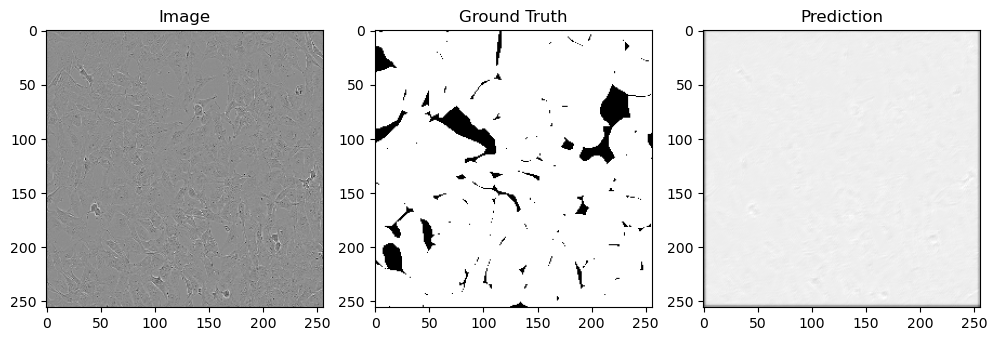

In [17]:
# 8. Visualization

import matplotlib.pyplot as plt

def plot_sample(image, mask, pred_mask=None):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2 if pred_mask is None else 3, 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title("Image")
    
    plt.subplot(1, 2 if pred_mask is None else 3, 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title("Ground Truth")
    
    if pred_mask is not None:
        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask.squeeze(), cmap='gray')
        plt.title("Prediction")
    
    plt.tight_layout()
    plt.show()

# sample
sample_idx = 0
pred_mask = model.predict(X_test[sample_idx][np.newaxis, ...])[0]
plot_sample(X_test[sample_idx], y_test[sample_idx], pred_mask)



=== Original Model Performance ===
Test Accuracy: 0.6155
Test Loss: 0.6712
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


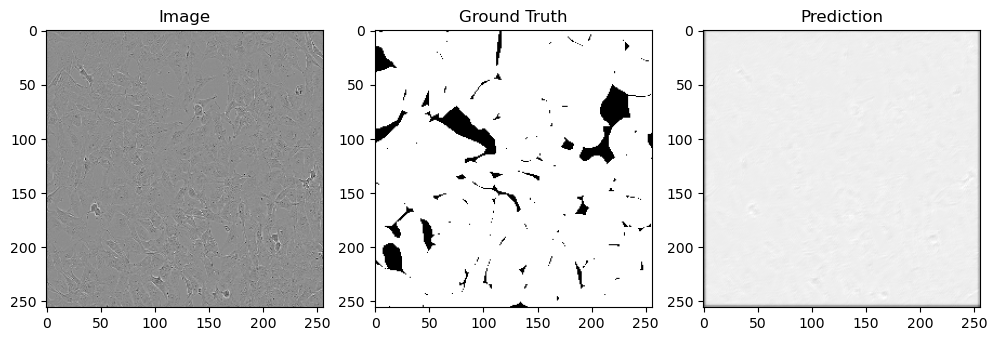

In [19]:
# Evaluation
print("\n=== Original Model Performance ===")
orig_test_loss, orig_test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {orig_test_acc:.4f}")
print(f"Test Loss: {orig_test_loss:.4f}")

sample_idx = 0  
orig_pred = model.predict(X_test[sample_idx][np.newaxis,...])[0]
plot_sample(X_test[sample_idx], y_test[sample_idx], orig_pred)

The test accuracy of 61.55% suggests there's room for improvement.



In [34]:
# Testing with enhanced U-Net with residual connections

def improved_unet(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)
    
    # Residual block function
    def res_block(x, filters):
        shortcut = x
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        # Add shortcut if dimensions match, otherwise return processed tensor
        if shortcut.shape[-1] == filters:
            x = layers.Add()([shortcut, x])
        x = layers.Activation('relu')(x)  # Activation after addition
        return x
    
    # --- Data Augmentation ---
    x = layers.RandomFlip()(inputs)
    x = layers.RandomRotation(0.1)(x)
    
    # --- Encoder ---
    # Downsample 1
    d1 = res_block(x, 16)
    p1 = layers.MaxPooling2D((2, 2))(d1)
    
    # Downsample 2
    d2 = res_block(p1, 32)
    p2 = layers.MaxPooling2D((2, 2))(d2)
    
    # Downsample 3
    d3 = res_block(p2, 64)
    p3 = layers.MaxPooling2D((2, 2))(d3)
    
    # --- Bottleneck ---
    b1 = res_block(p3, 128)
    
    # --- Decoder ---
    # Upsample 1
    u1 = layers.UpSampling2D((2, 2))(b1)
    u1 = layers.concatenate([u1, d3])
    u1 = res_block(u1, 64)
    
    # Upsample 2
    u2 = layers.UpSampling2D((2, 2))(u1)
    u2 = layers.concatenate([u2, d2])
    u2 = res_block(u2, 32)
    
    # Upsample 3
    u3 = layers.UpSampling2D((2, 2))(u2)
    u3 = layers.concatenate([u3, d1])
    u3 = res_block(u3, 16)
    
    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(u3)
    
    return models.Model(inputs, outputs)

improved_model = improved_unet()
improved_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_flip_3       │ (None, 256, 256,  │          0 │ input_layer_4[0]… │
│ (RandomFlip)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_rotation_3   │ (None, 256, 256,  │          0 │ random_flip_3[0]… │
│ (RandomRotation)    │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_73 (Conv2D)  │ (None, 256, 256,  │        160 │ random_rotation_… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_73[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_46       │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_74 (Conv2D)  │ (None, 256, 256,  │      2,320 │ activation_46[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_74[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_47       │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 128, 128,  │          0 │ activation_47[0]… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_75 (Conv2D)  │ (None, 128, 128,  │      4,640 │ max_pooling2d_13… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_75[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_48       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 128, 128,  │      9,248 │ activation_48[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_76[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_49       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 64, 64,    │          0 │ activation_49[0]

 Total params: 489,825 (1.87 MB)

 Trainable params: 488,417 (1.86 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [52]:
# Custom Dice Loss func

def dice_coef(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

# Custom Dice Loss function
def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)
    dice = (2. * intersection + smooth) / (union + smooth)
    return 1 - dice

# Class-based Dice loss (optional, for multi-class use)
class DiceLoss(tf.keras.losses.Loss):
    def __init__(self, smooth=1e-6, name='dice_loss'):
        super().__init__(name=name)
        self.smooth = smooth

    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
        union = tf.reduce_sum(y_true, axis=[1, 2]) + tf.reduce_sum(y_pred, axis=[1, 2])
        dice = (2. * intersection + self.smooth) / (union + self.smooth)
        return 1 - tf.reduce_mean(dice)

# Compile the model
improved_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=dice_loss,  # or DiceLoss()
    metrics=[dice_coef]
)

history = improved_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - dice_coef: 0.7277 - loss: 0.2723 - val_dice_coef: 0.2928 - val_loss: 0.7146
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - dice_coef: 0.7302 - loss: 0.2700 - val_dice_coef: 0.2022 - val_loss: 0.8041
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - dice_coef: 0.7109 - loss: 0.2893 - val_dice_coef: 0.3234 - val_loss: 0.6866
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - dice_coef: 0.7336 - loss: 0.2663 - val_dice_coef: 0.2112 - val_loss: 0.7997
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - dice_coef: 0.7346 - loss: 0.2657 - val_dice_coef: 0.3142 - val_loss: 0.6992
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - dice_coef: 0.7277 - loss: 0.2723 - val_dice_coef: 0.4145 - val_loss: 0.6026
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - dice_coef: 0.7337 - loss: 0.2663 - val_dice_coef: 0.6239 - val_loss: 0.3962
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - dice_coef: 0.7183 - loss: 0.2814 - val_dice_coef: 0.


=== Improved Model Performance ===
Test Dice Coefficient: 0.7735
Test Loss: 0.2249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


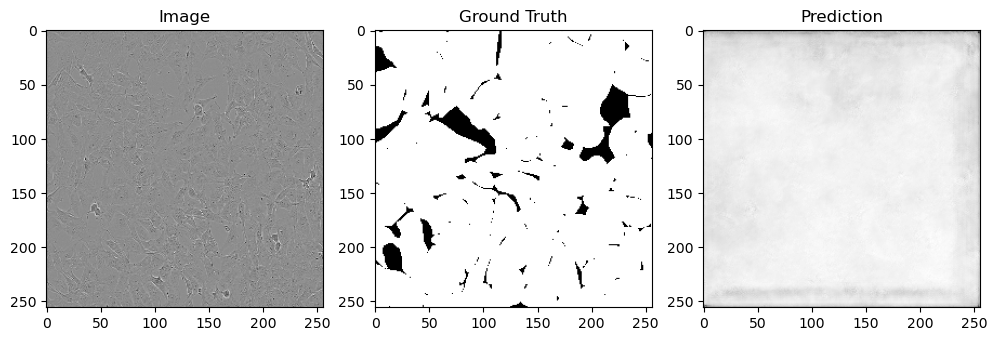

In [56]:
print("\n=== Improved Model Performance ===")
results = improved_model.evaluate(X_test, y_test, verbose=0)

if len(results) == 3:
    test_loss, test_dice_coef, test_accuracy = results
    print(f"Test Dice Coefficient: {test_dice_coef:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
else:
    test_loss, test_dice_coef = results
    print(f"Test Dice Coefficient: {test_dice_coef:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

sample_idx = 0
pred = improved_model.predict(X_test[sample_idx][np.newaxis,...])[0]
plot_sample(X_test[sample_idx], y_test[sample_idx], pred)

In [46]:
# Evaluate improved model

print("\n=== Model Performance Comparison ===")

# Get metrics for both models
orig_pred = unet_model.predict(X_test)
orig_dice = dice_coef(y_test, orig_pred).numpy().mean()
orig_loss = original_model.evaluate(X_test, y_test, verbose=0)[0]

imp_loss, imp_dice = improved_model.evaluate(X_test, y_test, verbose=0)
imp_pred = improved_model.predict(X_test)

print(f"Dice Coefficient: {imp_dice:.4f} (Original: {orig_dice:.4f})")
print(f"Loss: {imp_loss:.4f} (Original: {orig_loss:.4f})")

# Enhanced visualization with proper metrics
def plot_comparison(idx):
    fig, axes = plt.subplots(1, 4, figsize=(18, 6))
    
    # Input image
    axes[0].imshow(X_test[idx].squeeze(), cmap='gray')
    axes[0].set_title("Input Image")
    
    # Original prediction
    axes[1].imshow(orig_pred[idx].squeeze(), cmap='gray')
    axes[1].set_title(f"Original Model\nDice: {orig_dice:.2f}")
    
    # Improved prediction
    axes[2].imshow(imp_pred[idx].squeeze(), cmap='gray')
    axes[2].set_title(f"Improved Model\nDice: {imp_dice:.2f}")
    
    # Ground truth
    axes[3].imshow(y_test[idx].squeeze(), cmap='gray')
    axes[3].set_title("Ground Truth")
    
    for ax in axes: ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot multiple random samples
for _ in range(3):  # Display 3 random examples
    sample_idx = np.random.randint(0, len(X_test))
    plot_comparison(sample_idx)


=== Model Performance Comparison ===


AttributeError: 'function' object has no attribute 'predict'